# 3. Data Analysis and Visualization

**3.1. Groupby and aggregations using pandas**

Arguably the most fundamental transformation you can perform in Pandas is the group by function. Time and time again, this function proves its worth. So let's dive in. 

We'll start with the Iris data. 

In [1]:
import pandas as pd

In [3]:
iris = pd.read_csv('iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's apply a group by to Iris. In a group by, you determine the dimensions you want to group by, then specify an aggregation method. As a simple example, let's group by species and apply the maximum aggregation. The result gives us the max for each measurement. And we see we have three total species in our dataset. 

In [4]:
# a simple groupby on one dimension with one aggregation for all variables

# can flatten hierarchical index with reset_index()

iris.groupby(['species']).max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


With group by, we can pass several different types of aggregations to multiple variables. To do this, call .ag after the group by and pass a dictionary with the variables you're interested in along with their associated aggregations. So for the sepal length, we return the mean, min, and max, and we'll count sepal width. Now here's our output. 

In [6]:
# Multiple aggregation methods to different variables

df = iris.groupby(['species']).agg({'sepal_length': ['mean', 'min', 'max',], 'sepal_width':'count'})
df

sepal_length           sepal_width
                   mean  min  max       count
species                                      
setosa            5.006  4.3  5.8          50
versicolor        5.936  4.9  7.0          50
virginica         6.588  4.9  7.9          50

Notice the hierarchical column index that's created as a result. It's useful to see how this type of column index works. Let's select the sepal length column from our data. The result that's returned is all three aggregation types we chose for sepal length. 

In [7]:
df['sepal_length']

,mean,min,max
species,,,
setosa,5.006,4.3,5.8
versicolor,5.936,4.9,7.0
virginica,6.588,4.9,7.9


Often, you'll want to flatten hierarchical indexes for simplicity. This approach uses join to concatenate the top and bottom level of our column index. The result combines our variable name with the aggregation used. 

In [8]:
# Flattening hierarchical indexes

df.columns = ['_'.join(col).strip() for col in df.columns.values ]
df.reset_index()
df

,sepal_length_mean,sepal_length_min,sepal_length_max,sepal_width_count
species,,,,
setosa,5.006,4.3,5.8,50
versicolor,5.936,4.9,7.0,50
virginica,6.588,4.9,7.9,50


You can also specify groupings without first applying any aggregation at all. Here, we'll create a grouping of Iris by species called groupings. Now with the groupings configured, you can reference the groupings for aggregating and filtering your data. The get group function operates like a where clause in SQL, filtering our data that is a part of the group you specify. Let's return the setosa group. Great, this yields all rows in our data with species of setosa. 

In [9]:
# Specify groupings prior to any aggregation

groupings = iris.groupby('species')

In [10]:
groupings.get_group('setosa').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


After defining your groups, you can later call aggregate functions. Here, we'll call max, and this returns an identical output to our max aggregation above. 

In [11]:
# max

groupings.max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


You can also apply Lambda functions to your groupings. For simplicity, we'll apply the max aggregation, which again, is identical to the output above. 

In [ ]:
# lambda and max

groupings.apply(lambda x: x.max())

C:\Users\zafar\AppData\Local\Temp\ipykernel_25588\878957764.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  groupings.apply(lambda x: x.max())


,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,5.8,4.4,1.9,0.6,setosa
versicolor,7.0,3.4,5.1,1.8,versicolor
virginica,7.9,3.8,6.9,2.5,virginica


With groupings configured, you can use what is called filter to filter your data frame on an aggregate constraint. This is quite similar to a having clause you find in SQL. In our example, we're going to filter our data frame for only those species that have a maximum petal length below five. 

In [15]:
groupings.filter(lambda x: x['petal_length'].max() <5 )

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Looking at the table above, we can expect this will only return setosa species. The result is all 50 measurements from the setosa species. So there you have it. You're now equipped to transform your data using Pandas powerful group by function.

**3.2. Reshaping Dataframes (pivot, stack)**

After you've got your data, and you've began the data prep phase of your work, there's often a hurdle you've got to jump before you can really extract inside. Often your data simply is not in the appropriate format, or level of granularity needed to begin creating those snazzy visualizations or machine learning models. Luckily, pandas offer several easy to use and flexible functions for you to reshape your data. The first of these is called pivot. 

``Pivot`` allows you to take away a level of granularity from your rows and pivot that to your columns. 

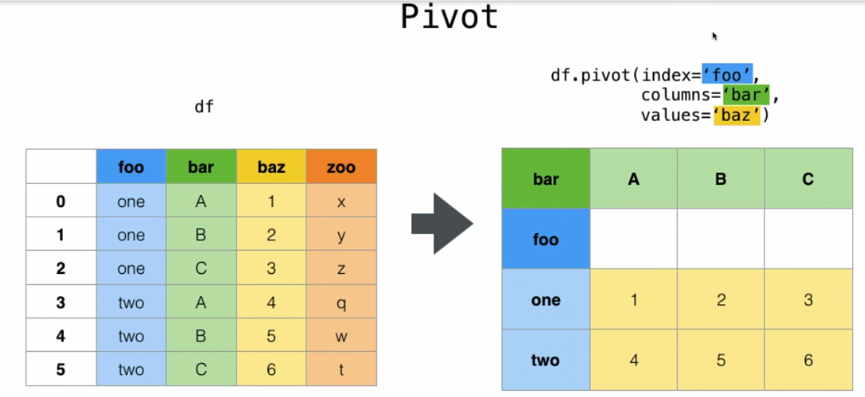

You simply identify the index you want to use, the variable you want to pivot from your rows to your columns, in which values you want to populate your data frame. 

``Note, pivot doesn't perform any kind of aggregation. ``

So for this to work, the index and columns you choose, will have to be unique combinations.


To show this, we'll create the following data frame. Notice there's two teams per region, and revenue and cost data for each region and team. 

In [16]:
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})
df

,Region,Team,Revenue,Cost
0,North,One,7500,5200
1,West,One,5500,5100
2,East,One,2750,4400
3,South,One,6400,5300
4,North,Two,2300,1250
5,West,Two,3750,1300
6,East,Two,1900,2100
7,South,Two,575,50


Great, now let's pivot team to columns, using region as our index. For values, we'll use revenue. Now you see, region is our index and teams is now up top. The values here represent revenue. 

In [17]:
df.pivot(index = 'Region', columns='Team', values='Revenue')

Team,One,Two
Region,,
East,2750,1900
North,7500,2300
South,6400,575
West,5500,3750


``Stack``

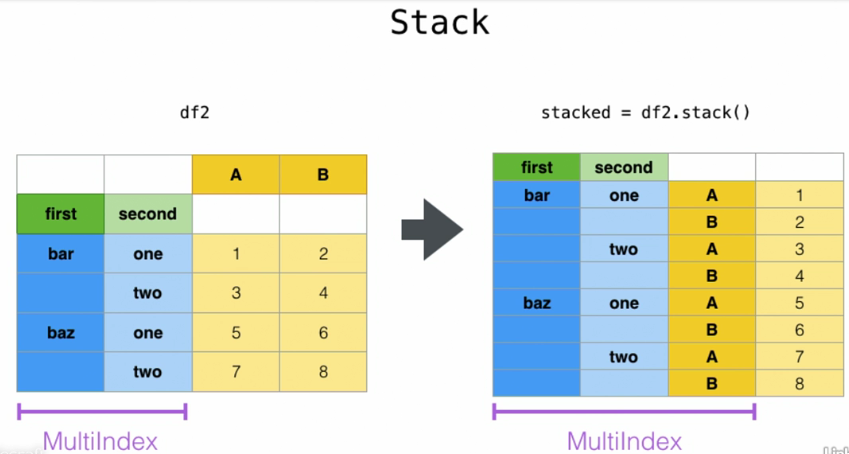


Next, we'll use stack to work in the opposite direction. That is, we'll pivot column labels to our rows. But first we need to set a multi-index for our data frame. To do this, we use set index and specify region and team. All right, now I'll call the stack function and create a new data frame called stacked.Excellent, so now you can see individual rows for revenue and cost and the values for both now lives within the same column. 

In [18]:
df2 = df.set_index(['Region', 'Team'])

In [19]:
stacked = pd.DataFrame(df2.stack())
stacked

0
Region Team              
North  One  Revenue  7500
            Cost     5200
West   One  Revenue  5500
            Cost     5100
East   One  Revenue  2750
            Cost     4400
South  One  Revenue  6400
            Cost     5300
North  Two  Revenue  2300
            Cost     1250
West   Two  Revenue  3750
            Cost     1300
East   Two  Revenue  1900
            Cost     2100
South  Two  Revenue   575
            Cost       50

`Unstack`

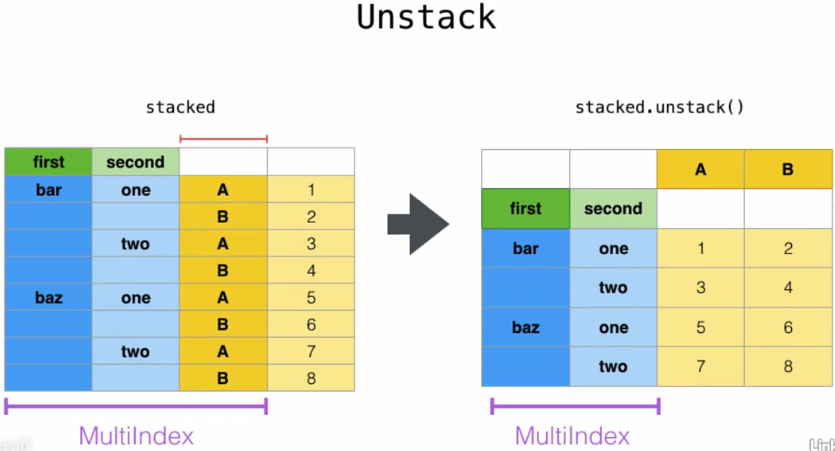

Similarly, we can reverse this process with unstack, that is we'll pivot row labels back to our columns. And now you see revenue and costs each have their own column once again. Note that this is simply the default behavior and you can actually specify at what level in your multi-index you want to unstack.

In [20]:
stacked.unstack()

0      
            Revenue  Cost
Region Team              
East   One     2750  4400
       Two     1900  2100
North  One     7500  5200
       Two     2300  1250
South  One     6400  5300
       Two      575    50
West   One     5500  5100
       Two     3750  1300

The default is negative one or the inner most index, and we could change that to negative two or negative three, to unstack by team or region respectively, or better yet you can specifically name the index you want to unstack. For example, let's specify region. Great, now we've got region up top.

In [21]:
stacked.unstack('Region')

0                  
Region        East North South  West
Team                                
One  Revenue  2750  7500  6400  5500
     Cost     4400  5200  5300  5100
Two  Revenue  1900  2300   575  3750
     Cost     2100  1250    50  1300

`Melt`

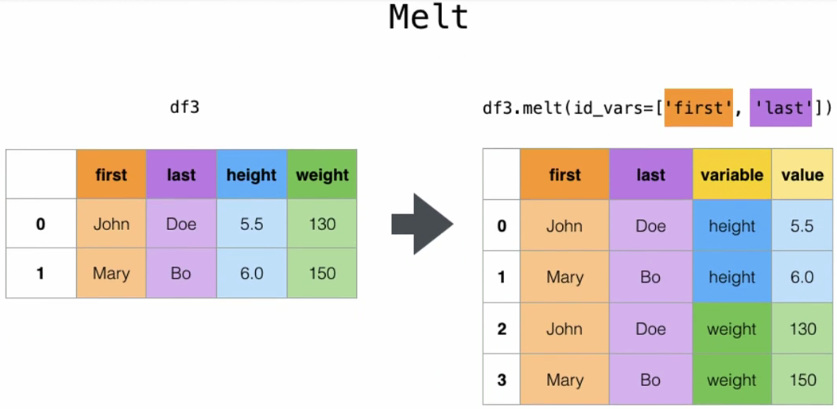

One other way to reshape your data frames to be mindful of is melt. This allows you to specify ID variables from your columns which will stay intact. All remaining columns or measure variables will be pivoted from the column to the row level.

Returning to our original data frame, we're going to designate region and team as our ID variables, then pivot revenue and cost back to the row level. Great, now all of the reshaping approaches so far require that we have unique combinations of the row and column variables that we're pivoting if that's not the case in your data. So for example, say we had multiple revenue entries for each region and team, you'd want to use the handy pivot table function.

In [22]:
df.head(3)

,Region,Team,Revenue,Cost
0,North,One,7500,5200
1,West,One,5500,5100
2,East,One,2750,4400


In [23]:
df.melt(id_vars=['Region', 'Team'], var_name='value type')

,Region,Team,value type,value
0,North,One,Revenue,7500
1,West,One,Revenue,5500
2,East,One,Revenue,2750
3,South,One,Revenue,6400
4,North,Two,Revenue,2300
5,West,Two,Revenue,3750
6,East,Two,Revenue,1900
7,South,Two,Revenue,575
8,North,One,Cost,5200
9,West,One,Cost,5100


Here, we set an index, determine which variables we want pivoted to the columns if any, then designate our values. We'll go with revenue here. By default, pivot table uses mean to aggregate, but you can specify the method you want to use as well. Excellent, the average revenue by region is higher for team one than for team two. Now, one last thing, let's add region to columns to see how that changes it. 

In [24]:
# Supporting aggregation with pivot_table

df.pivot_table(index='Team', values='Revenue')

,Revenue
Team,
One,5537.50
Two,2131.25


Now we have the average for each region and team. Basically, pivot table acts like a pandas group by, then unstacks by the variable you specify in columns. Between these methods, there is always a way to get your data in the format you need to take it to the next level. When in doubt, PivotTable is the most flexible of the bunch and is a great place to start.

In [25]:
df.pivot_table(index='Team', columns='Region', values='Revenue')

Region,East,North,South,West
Team,,,,
One,2750.0,7500.0,6400.0,5500.0
Two,1900.0,2300.0,575.0,3750.0


**3.3. Merging (merge, join) and concatenating (concat) dataframes**

Soon after you've gone through the steps to clean up your data frame, you may find it's time to incorporate other data alongside it. Here, we'll discuss the many options for emerging and combining data from different data frames. Let's dive in. 

In [38]:
import pandas as pd
import numpy as np

In [36]:
df1 = pd.DataFrame({'letter': ['A', 'B', 'C', 'D'],
                    'number': [1, 2, 3, 4]})
df2 = pd.DataFrame({'letter': ['C', 'D', 'E', 'F'],
                    'number': [3, 4, 5, 6]})

`Left Join`

We'll start by creating two different data frames consisting of letters and numbers. Note the overlap between these two. If you're familiar with SQL, you've heard of joins specifically left joins versus inter-joins versus right joins. We'll start by performing a left join between our two data frames. And the function to use in Pandas is called merge. To merge two data frames, start with your first data frame aka the left data frame then call merge and pass in the second data frame aka the right data frame. You'll also want to specify the join type. In this case a left join and the join criteria. Here will match on the number column in both data frames. Excellent, so you see DF1 shows up in its entirety and only those letters in DF2 that had numbers matching into DF1 came through. That's the definition of a left join. 

Note the underscore x and underscore y suffixes that have been added as a result of emerge. We'll address that next. 


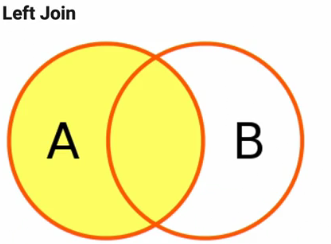

In [28]:
df1.merge(df2, how='left', on='number')

,letter_x,number,letter_y
0,A,1,NaN
1,B,2,NaN
2,C,3,C
3,D,4,D


`Inner Join`

The next type of join to use is an inner join. Here will only capture the overlap between our two data frames. Often the column you'll be joining on will have different names in your two data sources. In this example, we use left on and right on to specify the join criteria for each of our data frames. Note, you can join on multiple columns here as well. Great, we see two rows where the numbers match into both data frames. 

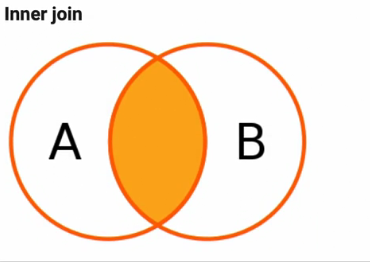

In [29]:
df1.merge(df2, how='inner', left_on='number', right_on='number')

,letter_x,number,letter_y
0,C,3,C
1,D,4,D


`Right Join`

We can also perform what's called a right join which essentially reverses the order of the left join. Also, we're going to use the suffixes argument to specify how we want our columns to look after joining. There you go. Note that all data from DF2, our right data frame was returned along with those that matched from DF1. Also see the underscore right suffix applied to the letter column from DF2. 


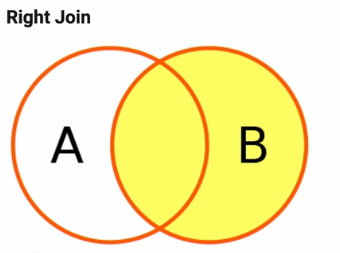

In [30]:
df1.merge(df2, how='right', on='number', suffixes=('','_right'))

,letter,number,letter_right
0,C,3,C
1,D,4,D
2,NaN,5,E
3,NaN,6,F


**Union with** ``pd.concat``

Another cool operation in Pandas is to union your data frames. Essentially stacking them on top of each other. We'll use pd.concat to do this. When using pd.concat, pass the list of the data frames you want to combine and be sure to reset the index and specify drop equals true. Now we have eight rows of data from both data frames, one on top of the other. Note, the indexes have been reset. You'll notice that D and C are repeated in our dataset. And often we want to ensure uniqueness when unioning data frames. 

In [43]:
# drop duplicates with .drop_duplicates()

df3 = pd.concat([df1,df2]).reset_index(drop=True)
df3

,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,C,3
5,D,4
6,E,5
7,F,6


To do this, we can rerun and specify drop duplicates. This drop two rows and now we have uniqueness in our data frame.

In [45]:
df3 = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)
df3

,letter,number
0,A,1
1,B,2
2,C,3
3,D,4
4,E,5
5,F,6


`Concatenate dataframes horizontally`

You can also use pd.concat to stack data frames horizontally by specifying access equals one which refers to our column access. 


In [33]:
df4 = pd.concat([df1, df2], axis = 1)
df4

,letter,number,letter,number
0,A,1,C,3
1,B,2,D,4
2,C,3,E,5
3,D,4,F,6


`Joining alyong your index`

The last topic we'll cover is joining data frames using the index values. To do this, use the join function. We'll create another data frame then join that to our DF2. We don't need to specify the join criteria since it will be matching by index but we do need to add in a suffix for repeated column names. F

In [48]:
join_df = pd.DataFrame({'letter': ['F','G', 'H', 'I'],
                        'number': [6, 7, 8, 9]})

In [49]:
df2.join(join_df, rsuffix='_right' )

,letter,number,letter_right,number_right
0,C,3,F,6
1,D,4,G,7
2,E,5,H,8
3,F,6,I,9


antastic, we've run through the most fundamental ways you can join data frames. When you've mastered these approaches, you'll find just about anything is possible with Pandas.

**<center> 3.4. Categorizing and Labelling Data**



Sure enough, pandas has loads of capabilities to create categories, labels and buckets within your datasets, all with the goal of deriving insights from your qualitative data. 

In [2]:
import pandas as pd

Let's investigate a few options. First, we'll create a data frame for counts of salmon on the Skokomish river in Washington state. Here we have species of salmon, where the population is from and they count recorded for those fish.

In [3]:
df = pd.DataFrame({"Species":['Chinook','Chum','Coho','Steelhead','Bull Trout'],
             "Population":['Skokomish','Lower Skokomish','Skokomish','Skokomish','SF Skokomish'],
             "Count":[1208,2396,3220,6245,8216]})
df

,Species,Population,Count
0,Chinook,Skokomish,1208
1,Chum,Lower Skokomish,2396
2,Coho,Skokomish,3220
3,Steelhead,Skokomish,6245
4,Bull Trout,SF Skokomish,8216


*Binning Numerical data with* `pd.cut`

One really handy function in Pandas is called cut. This allows you to create bins for numerical data, then apply those to your data frame. We're going to create bins of 2000 for our count data. Notice here, I important NumPy to make use of NumPy dot inf or infinity, for the top end of our buckets. We label each of the buckets as well, from low return to high return. 

In [5]:
import numpy as np
bins = [0, 2000, 4000, 6000, 8000, np.inf]
labels = ['Low Return', 'Below Avg Return', 'Avg Return', 'Above Avg Return', 'High Return']

Next, we create a new column in our data frame called count category. And we pass the count column along with the bins and the labels we've created. This creates our buckets. Great, now you can see the bucketing was successful.

In [7]:
df['Count Category'] = pd.cut(df['Count'], bins, labels=labels)
df

,Species,Population,Count,Count Category
0,Chinook,Skokomish,1208,Low Return
1,Chum,Lower Skokomish,2396,Below Avg Return
2,Coho,Skokomish,3220,Below Avg Return
3,Steelhead,Skokomish,6245,Above Avg Return
4,Bull Trout,SF Skokomish,8216,High Return


*Map Species to Endangered Status*

Another useful tactic is to create a dictionary which maps values in your data frame into groupings. Here, we'll create a dictionary mapping species to its federal endangered species status. Next, we'll apply the mappings to our species column using map. It looks good. 

In [8]:
fed_status ={"Chinook":"Threatened",
"Chum":"Not Warranted",
"Coho":"Not Warranted",
"Steelhead":"Threatened"}

In [10]:
df['Federal Status'] = df['Species'].map(fed_status)
df

,Species,Population,Count,Count Category,Federal Status
0,Chinook,Skokomish,1208,Low Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
4,Bull Trout,SF Skokomish,8216,High Return,NaN


*Introducing the* `categorical` *data type*

Pandas even has a specific categorical data type that's useful for us as well. We're going to convert our count category column using Pandas dot categorical. Notice, we pass the column of our data frame, ordered equals true which will make this variable ordinal meaning high return has a higher order, and pass our labels from above to categories. In the printout, you can see this hierarchy taking place, low returns less than below average return, and so on. 

In [11]:
df['Count Category'] = pd.Categorical(df['Count Category'],
                                      ordered=True,
                                      categories=labels)
df['Count Category']

0          Low Return
1    Below Avg Return
2    Below Avg Return
3    Above Avg Return
4         High Return
Name: Count Category, dtype: category
Categories (5, object): ['Low Return' < 'Below Avg Return' < 'Avg Return' < 'Above Avg Return' < 'High Return']

In fact, we can even use this ordering to sort our data. To do this, we'll use sort values by the count category column, and it'll be descending. Look at that, the data is now sorted from the highest return category to the lowest.

In [ ]:
# sorrt data
df.sort_values(by=['Count Category'], ascending=False)

,Species,Population,Count,Count Category,Federal Status
4,Bull Trout,SF Skokomish,8216,High Return,NaN
3,Steelhead,Skokomish,6245,Above Avg Return,Threatened
1,Chum,Lower Skokomish,2396,Below Avg Return,Not Warranted
2,Coho,Skokomish,3220,Below Avg Return,Not Warranted
0,Chinook,Skokomish,1208,Low Return,Threatened


*Use' `get_dummies()` *to Convert a Categorical variable into a Dummy variable*

Another function, which is especially useful for statistics and machine learning is get_dummies. This allows us to take a categorical variable and perform what's called one hot encoding. By which we create a column for each category and place a one, if that is true, or zero, if not. Here's an example of how that looks. So there you have it, go forth and categorize your data.

In [13]:
pd.get_dummies(df['Count Category'])

,Low Return,Below Avg Return,Avg Return,Above Avg Return,High Return
0,True,False,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,False,True
